In [1]:
from glob import glob

import pandas as pd
import matplotlib.pyplot as plt

import passenger

In [2]:
blast_paths = glob("passenger-blast/[567]_Ig*.tsv")
#prefix = "8a"
#mut_freq_name = prefix+"_mut_freq"
chigy = passenger.CHIGY_HC
max_mutation_count = 10
max_n_count = 10
# 2 or 3 gap segments, which corresponds to 0 or 1 indels
allowable_gap_segment_counts = [2, 3]

In [3]:
passenger.test_summarize_alignment()
passenger.test_correct_alignment()
passenger.test_summarize_alignment()
passenger.test_compute_mutation_counts_by_base()

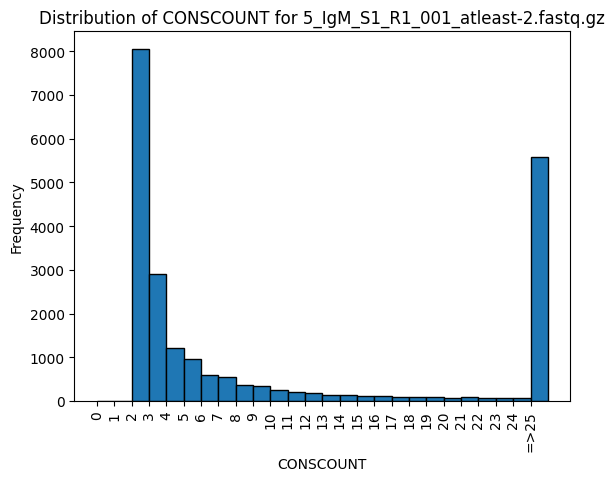

In [4]:
passenger.umi_histogram("../nextflow/data/passenger/tiago-processed/5_IgM_S1_R1_001_atleast-2.fastq.gz", 25)

In [5]:
blast_df = passenger.blast_df_of_blast_files(blast_paths)

duplicates = blast_df[blast_df.duplicated("subject")].copy()
duplicates.sort_values("subject", inplace=True)
duplicates.reset_index(drop=True).loc[0, "subject"]

Original length: 23502
Unique length: 23498
Original length: 27698
Unique length: 27680
Original length: 35452
Unique length: 35421
Original length: 43194
Unique length: 43124


'AAACGGGGGTAAAATGG|PRCONS=Mus-p5-IgM|SEQORIENT=F|CREGION=Mouse-IGHM-InternalC|CONSCOUNT=2|DUPCOUNT=1'

In [6]:
single_blast_df = passenger.read_blast_file(blast_paths[-1])

# find rows with duplicate "subject" values
# (these are the rows with multiple hits)
duplicates = single_blast_df[single_blast_df.duplicated("subject")]
duplicates.sort_values("subject", inplace=True)
duplicates.reset_index(drop=True).loc[0, "subject"]


/var/folders/16/pkph6n2962g3lf2wpwwt0wwr0000gn/T/ipykernel_12665/3703944832.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicates.sort_values("subject", inplace=True)


'AAAGGAAGCGCTATGAG|PRCONS=Mus-p5-IgM|SEQORIENT=F|CREGION=Mouse-IGHM-InternalC|CONSCOUNT=2582|DUPCOUNT=27'

In [7]:
blast_df.sort_values("dataset", inplace=True)

blast_df["dataset"].value_counts().sort_index()

dataset
5_IgG_S4_R1_001_atleast-2     7545
5_IgM_S1_R1_001_atleast-2    10452
6_IgG_S5_R1_001_atleast-2     5505
6_IgM_S2_R1_001_atleast-2     7742
7_IgG_S6_R1_001_atleast-2     4196
7_IgM_S3_R1_001_atleast-2     7754
Name: count, dtype: int64

In [8]:
processed_stop_df = chigy.processed_stop_df_of_blast_df(blast_df)
# processed_stop_df

processed_stop_df["dataset"].value_counts().sort_index()

dataset
5_IgG_S4_R1_001_atleast-2     7545
5_IgM_S1_R1_001_atleast-2    10452
6_IgG_S5_R1_001_atleast-2     5505
6_IgM_S2_R1_001_atleast-2     7742
7_IgG_S6_R1_001_atleast-2     4196
7_IgM_S3_R1_001_atleast-2     7754
Name: count, dtype: int64

In [9]:
chigy.pretty_print_alignments(processed_stop_df.head())

> 5_IgG_S4_R1_001_atleast-2 14705
-----------------------------------------------------------------------------------------------------------------------------GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTCAGACTCTGTCCCTCACCTGTTCTGTCACTGGCGACTCCATCACCAGTGGTTACTGGAACTGGATCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAACCAGTACTACCTGCAGTTGAATTCTGTGACTACTGAGGACACAGCCACATATTACTGTGCAAGGGACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTCTCCT------------CAG
                                                                                                                             |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||||||.|||.|||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||            |||
GACATAACAGCAAGAG

In [10]:
# Group by 'dataset' and count the number of rows in each group
row_counts_by_dataset = processed_stop_df.groupby('dataset').size()

# Print the count of rows for each 'dataset'
print(row_counts_by_dataset)


dataset
5_IgG_S4_R1_001_atleast-2     7545
5_IgM_S1_R1_001_atleast-2    10452
6_IgG_S5_R1_001_atleast-2     5505
6_IgM_S2_R1_001_atleast-2     7742
7_IgG_S6_R1_001_atleast-2     4196
7_IgM_S3_R1_001_atleast-2     7754
dtype: int64


In [11]:
processed_stop_df["mutation_count"].value_counts()[:20].sort_index()

mutation_count
0       7826
1      13727
2       7432
3       4483
4       2827
5       1778
6       1150
7        617
8        394
9        246
10       113
11        62
118       53
119       47
120       65
121       61
123       49
124       49
125       46
136       46
Name: count, dtype: int64

In [12]:
chigy_believable = processed_stop_df[(processed_stop_df["mutation_count"] < max_mutation_count) & (processed_stop_df["n_count"] < max_n_count) & (processed_stop_df["bookended_by_gaps"] == True)].copy()

chigy_believable


,subject,identity,length,mismatches,gap_openings,q_start,q_end,s_start,s_end,evalue,...,dataset,sequence,gap_segment_count,bookended_by_gaps,mutation_positions,mutation_bases,n_positions,mutation_count,n_count,Sequence number
14164,GGGAACGAAGCGAGAAG|PRCONS=Mus-p5-IgGb|SEQORIENT...,100.0,20,0,0,1,20,107,126,0.000075,...,5_IgG_S4_R1_001_atleast-2,ACATNACAGCNAGAGAGTGTCCGGTTAGTCTCAAGGAAGACTGAGA...,2,True,"[148, 247]","[T, G]",[],2,0,14164
14165,TTAAACTCGCGTCTGAC|PRCONS=Mus-p5-IgGb|SEQORIENT...,100.0,20,0,0,1,20,100,119,0.000075,...,5_IgG_S4_R1_001_atleast-2,GAAGAGAGAGTGTCCGGTTAGTCTCAAGGNAGACTGAGACACAGTC...,2,True,"[94, 168]","[C, G]","[232, 263, 274, 280]",2,4,14165
14167,CGAGAAGTATTGGCAAG|PRCONS=Mus-p5-IgGb|SEQORIENT...,100.0,20,0,0,1,20,99,118,0.000075,...,5_IgG_S4_R1_001_atleast-2,GAAAGAAAGTGTCCGGTTAGTCTCAAGGAAGACTGAGACACAGTCT...,2,True,"[96, 114, 153, 257]","[C, G, G, A]",[],4,0,14167
14169,GCAGAAAAAACAATAAC|PRCONS=Mus-p5-IgGb|SEQORIENT...,100.0,20,0,0,1,20,76,95,0.000075,...,5_IgG_S4_R1_001_atleast-2,GAAGGAAGACTGAGACACAGTCTTAGATATCACCATGGGATGGTCA...,2,True,[280],[C],[],1,0,14169
14171,ACGGGCGGAGTAAACGG|PRCONS=Mus-p5-IgGa|SEQORIENT...,100.0,20,0,0,1,20,108,127,0.000075,...,5_IgG_S4_R1_001_atleast-2,GACATAACAGCAAGTGAGTGTCCGGTTAGTCTCAAGGAAGACTGAG...,2,True,[],[],[],0,0,14171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38586,ATGGACGTGATTGATTT|PRCONS=Mus-p5-IgM|SEQORIENT=...,95.0,20,1,0,1,20,106,125,0.008000,...,7_IgM_S3_R1_001_atleast-2,GATAACAGCAAGAGAGTGTCCGGTTAGTCTCAAGGAAGACTGAGAC...,2,True,[155],[G],[],1,0,38586
38587,TTGCTGGATCCGCTTCT|PRCONS=Mus-p5-IgM|SEQORIENT=...,95.0,20,1,0,1,20,98,117,0.008000,...,7_IgM_S3_R1_001_atleast-2,GAAGAGAGTGTCCGGTTAGTCTCAAGGAAGACTGAGACACAGTCTT...,2,True,[],[],[],0,0,38587
38588,GCAGACGGGGGAGTAAC|PRCONS=Mus-p5-IgM|SEQORIENT=...,95.0,20,1,0,1,20,106,125,0.008000,...,7_IgM_S3_R1_001_atleast-2,GATAACAGCAAGAGAGTGTCCGGTTAGTCTCAAGGAAGACTGAGAC...,2,True,[],[],[],0,0,38588
38579,TAATGAAATTGTTGCAT|PRCONS=Mus-p5-IgM|SEQORIENT=...,95.0,20,1,0,1,20,106,125,0.008000,...,7_IgM_S3_R1_001_atleast-2,GATAACAGCAAGAGAGTGTCCGGTTAGTCTCAAGGAAGACTGAGAC...,2,True,[],[],[],0,0,38579


In [13]:
# Find representatives of the various gap counts
representative_gap_counts = chigy_believable.drop_duplicates(subset=["gap_segment_count"])
representative_gap_counts = representative_gap_counts.sort_values(by=["gap_segment_count"])
chigy.pretty_print_alignments(representative_gap_counts)

> 5_IgG_S4_R1_001_atleast-2 14164
----------------------------------------------------------------------------------------------------------------------------GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTCAGACTCTGTCCCTCACCTGTTCTGTCACTGGCGACTCCATCACCAGTGGTTACTGGAACTGGATCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAACCAGTACTACCTGCAGTTGAATTCTGTGACTACTGAGGACACAGCCACATATTACTGTGCAAGGGACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTCTCCTCAG--------------------
                                                                                                                            ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||.|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||                    
AC

In [14]:
chigy_believable = chigy_believable[chigy_believable["gap_segment_count"].isin(allowable_gap_segment_counts)]
chigy_believable["mutation_count"].value_counts().sort_index()

mutation_count
0     6671
1    11822
2     6377
3     3846
4     2448
5     1545
6      979
7      527
8      326
9      222
Name: count, dtype: int64

In [15]:
# Find representatives of the various gap counts
representative_mutation_counts = chigy_believable.drop_duplicates(subset=["mutation_count"])
representative_mutation_counts = representative_mutation_counts.sort_values(by=["mutation_count"])
chigy.pretty_print_alignments(representative_mutation_counts)

> 5_IgG_S4_R1_001_atleast-2 14171
-----------------------------------------------------------------------------------------------------------------------------GAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGAAACCTTCTCAGACTCTGTCCCTCACCTGTTCTGTCACTGGCGACTCCATCACCAGTGGTTACTGGAACTGGATCCGGAAATTCCCAGGGAATAAACTTGAGTACATGGGGTACATAAGCTACAGTGGTAGCACTTACTACAATCCATCTCTCAAAAGTCGAATCTCCATCACTCGAGACACATCCAAGAACCAGTACTACCTGCAGTTGAATTCTGTGACTACTGAGGACACAGCCACATATTACTGTGCAAGGGACTTCGATGTCTGGGGCGCAGGGACCACGGTCACCGTCTCCTCAG------------
                                                                                                                             |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||            
GACATAACAGCAAGTG

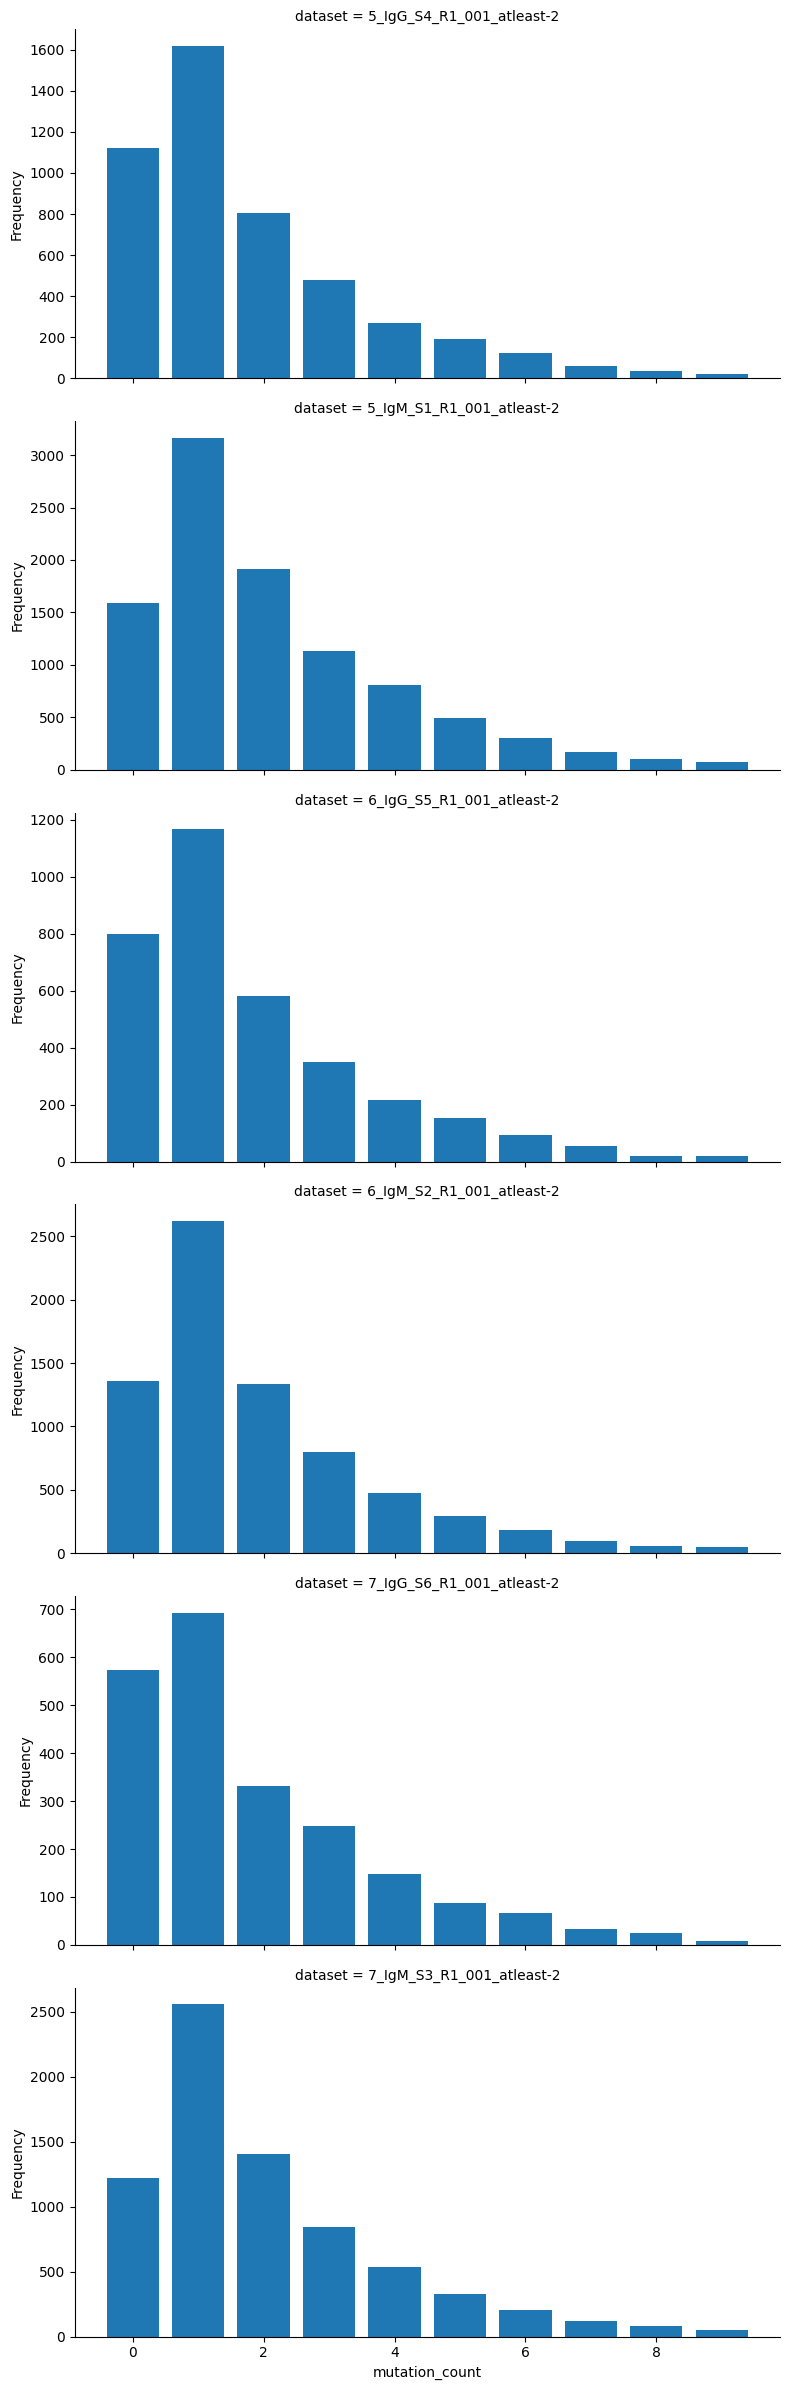

In [16]:
passenger.make_mutation_histogram(chigy_believable)

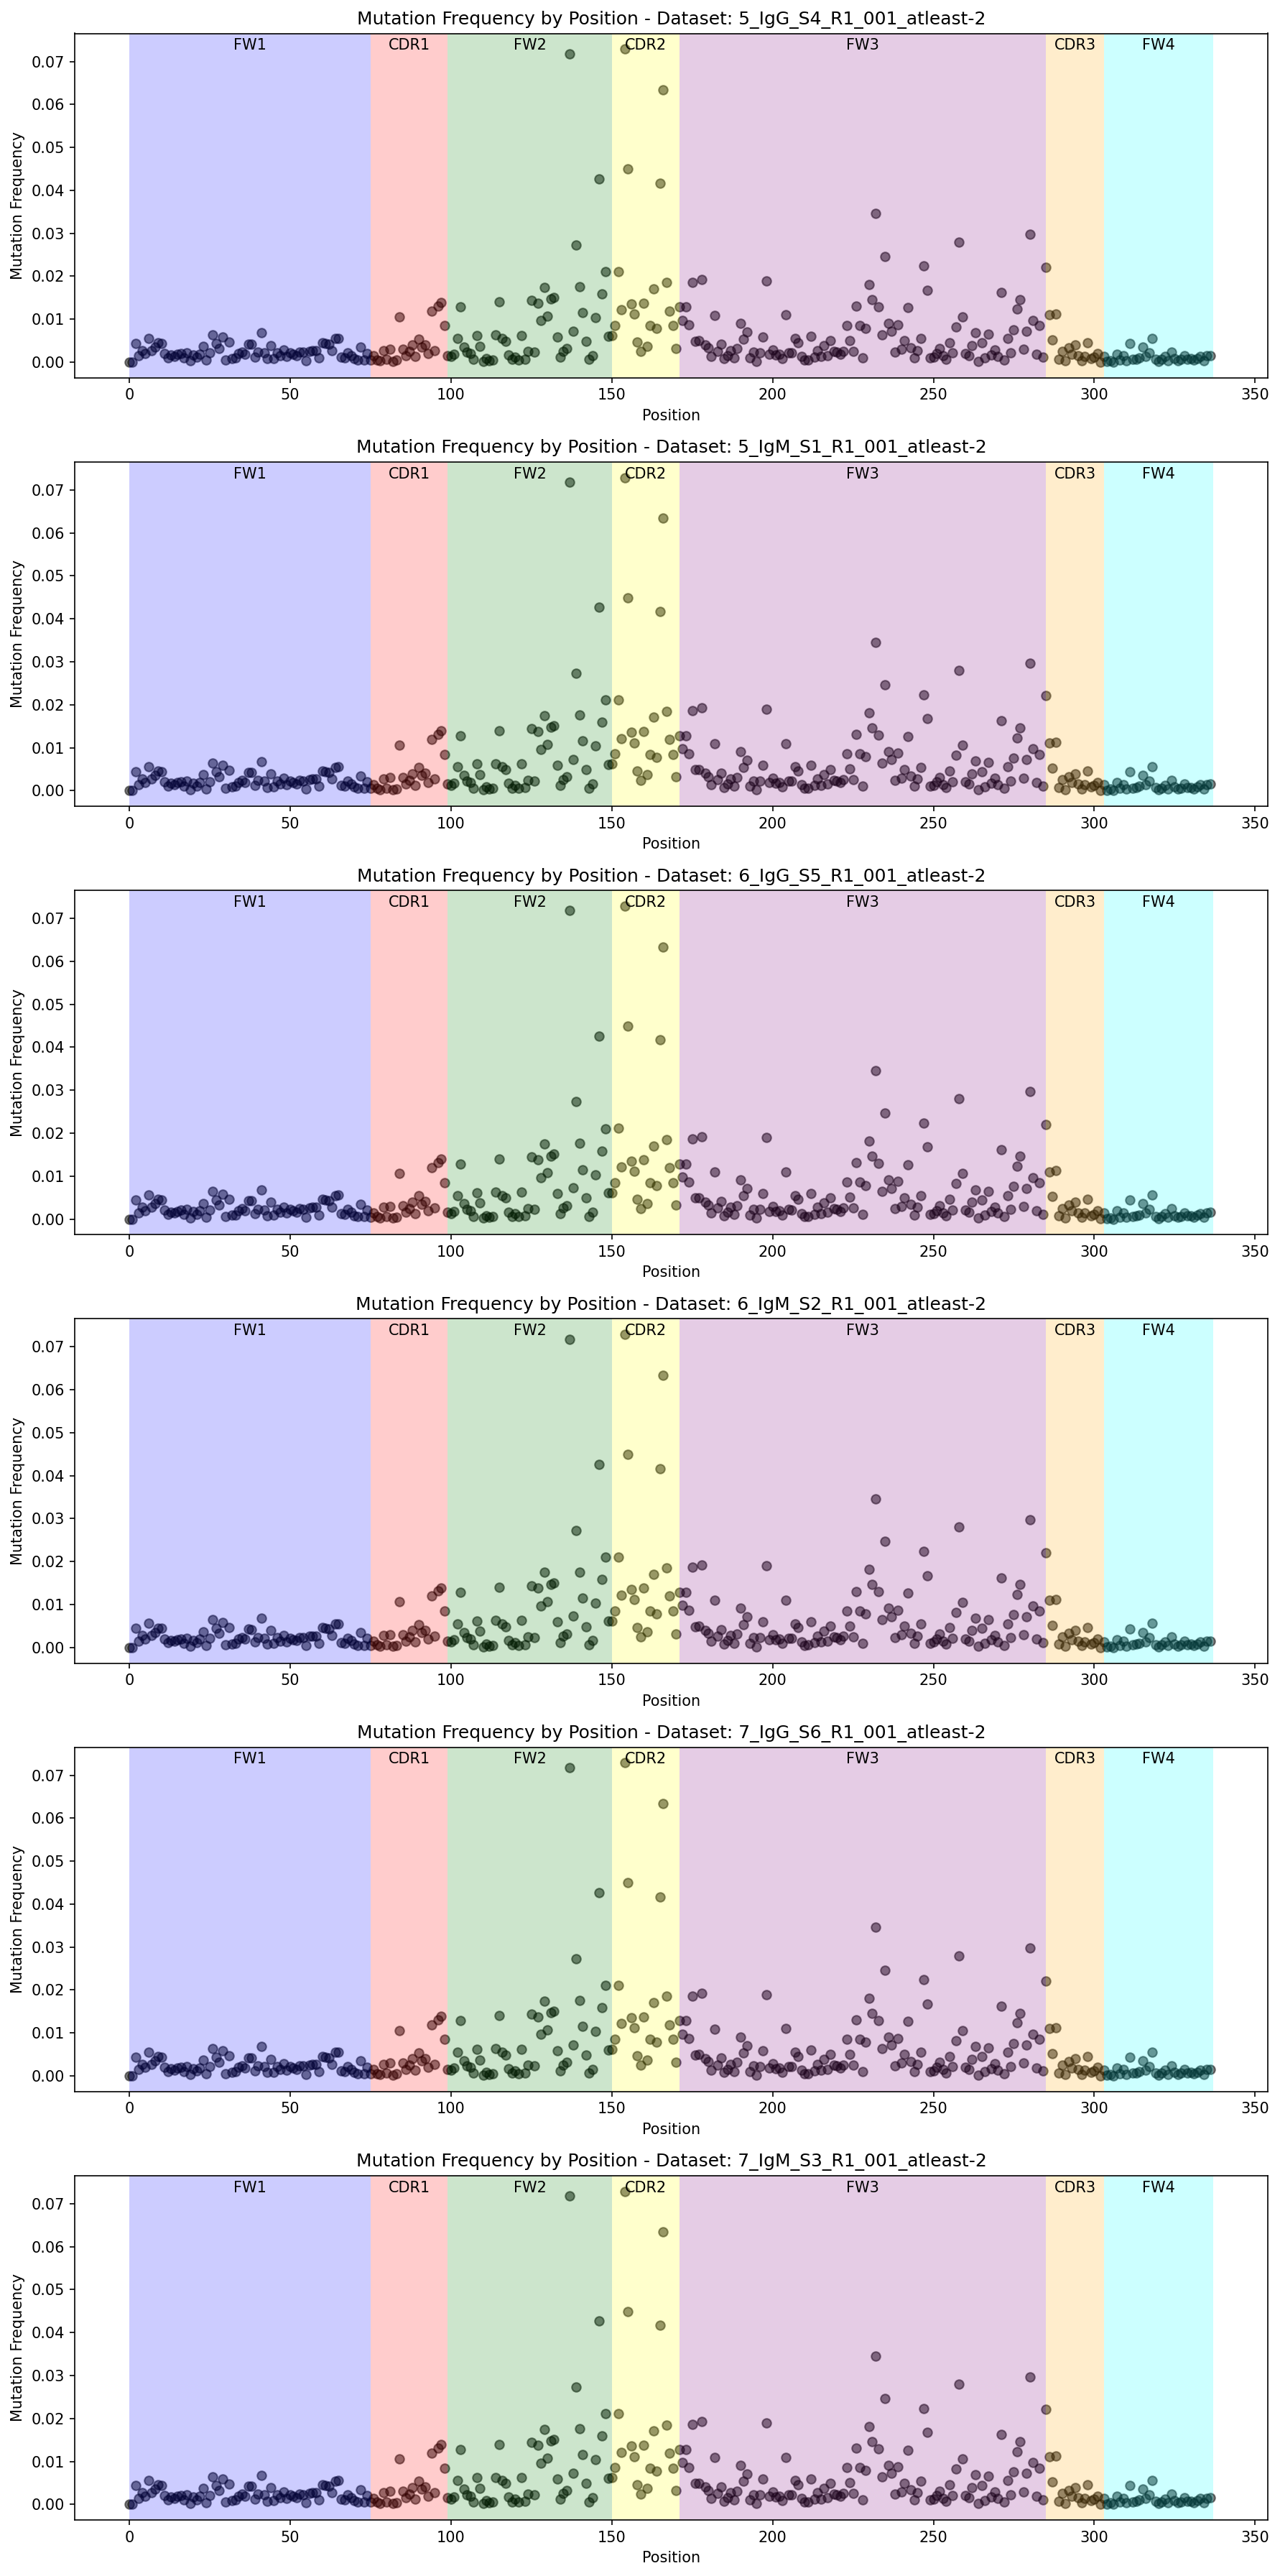

In [17]:
chigy.make_mutation_rate_plot(chigy_believable)


In [18]:
counts_by_base = passenger.compute_mutation_counts_by_base(chigy_believable, chigy.chigy_stop_trimmed)

counts_by_base.to_csv(prefix+"_counts_by_base.csv")

NameError: name 'prefix' is not defined

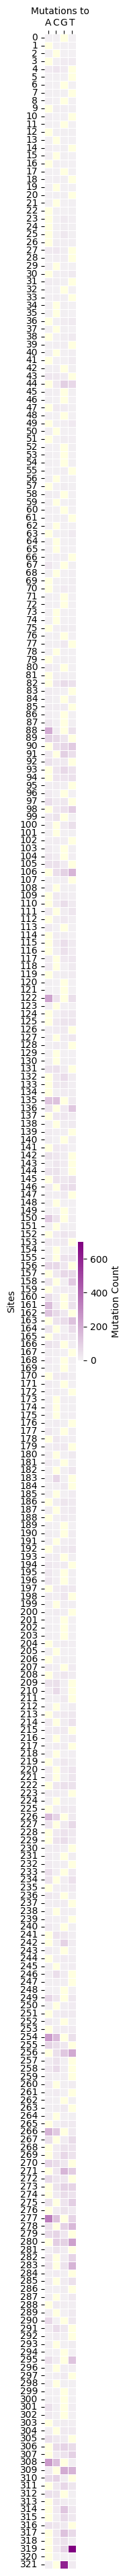

In [ ]:
passenger.create_mutation_heatmap(counts_by_base)

In [ ]:
counts_by_base.iloc[319]

A     -1
C     20
G     80
T    700
Name: 319, dtype: int64

In [ ]:
chigy_believable["sequence"].str[-20:].value_counts()


sequence
GAAATAAAACGGGCTGATGC    4911
GAAATAATACGGGCTGATGC     399
GAAATAAAAGGGGCTGATGC     334
GAAATAATAGGGGCTGATGC     125
GAAATGAAACGGGCTGATGC      90
                        ... 
GATTTAAAACGGGCTGATGC       1
GAAATAAAANGGNCTGATGC       1
AAAAAAAAACGGGCTGATGC       1
GAGATAACAGGGGCTGATGC       1
GAAATTACACGGGCTGATGC       1
Name: count, Length: 187, dtype: int64

In [ ]:
n_series = pd.DataFrame({"count of Ns": passenger.compute_thing_counts(chigy_believable, "n_positions")}).sort_values(by="count of Ns", ascending=False)
# set the index name of n_series to be "site"
n_series.index.name = "site"
n_series

,count of Ns
site,
321,248
319,229
295,142
307,76
306,34
...,...
170,0
171,0
172,0


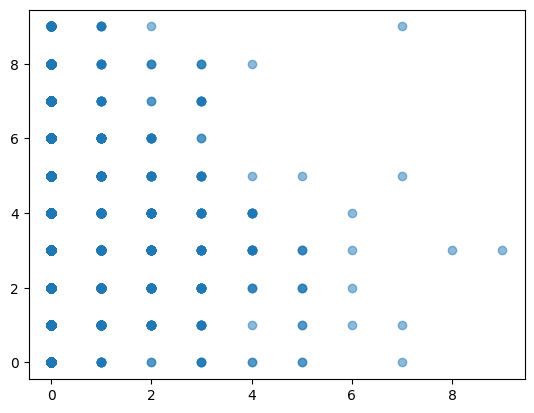

In [ ]:
# make a scatter plot of chigy_believable["n_count"] versus chigy_believable["mutation_count"]
plt.scatter(chigy_believable["n_count"], chigy_believable["mutation_count"], alpha=0.5)

In [ ]:
padded_seq = "NN" + chigy.chigy_stop_trimmed + "NN"

fivemers = [padded_seq[i:i+5] for i in range(len(padded_seq) - 4)]

pd.DataFrame({"fivemers": fivemers}).to_csv("fivemers.csv", index=False)

In [ ]:
mutation_frequency_by_position = passenger.mutation_frequency_by_position_of(chigy_believable)
pd.DataFrame({mut_freq_name: mutation_frequency_by_position}).to_csv(mut_freq_name+".csv", index=False)